# Names and IDs
 1. 206172686 Sarit Hollander
 2. 313326985 Shahar Shcheranski

# I. Condorcet's Jury Theorem (1785)

Assume voter probability to be correct as $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging).

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers).

Notes: Avoid loops where possible.

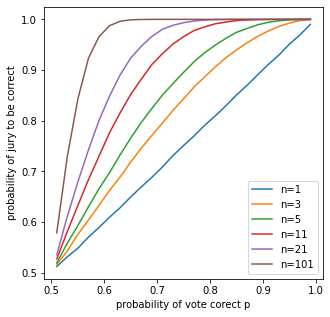

In [ ]:
# Answer (1)

import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom


# Calculate the probability that a jury gives the correct answer
def jury_m_correct(n,p):
  m = 0
  for k in range(int(n/2) + 1, n+1):
    m = m + binom.pmf(k=k, n=n, p=p)
  return m

# Return correct vote (1) with m probability (m = the probability that a jury gives the correct answer)
# Return uncorrect vote (0) with 1 - m probability
def jury_vote(m):
  random_number = random.choices([0,1], [1-m, m])
  return random_number[0]


# Monte Carlo Simulation
def monte_carlo(N, n_voters, p_voter):
  results = 0
  m = jury_m_correct(n_voters,p_voter)

  for i in range(N):
      majority_decision_result = jury_vote(m)
      results = results + majority_decision_result

  return results/N


# Number of voters
jury_voters = [1, 3, 5, 11, 21, 101]
# Voter probability to be correct (p>0.5)
voter_probability = np.arange(0.51,1.01,0.02)


n_results = []
for j in jury_voters:
  jury = [[],[]]
  for p in voter_probability:
    m_c = monte_carlo(100000, j, p)
    jury[0].append(p)
    jury[1].append(m_c)
  n_results.append(jury)


# Plot
plt.figure(figsize=(5, 5), facecolor='w')
for i in range(0,len(jury_voters)):
  plt.plot(n_results[i][0], n_results[i][1]  , label= "n="+str(jury_voters[i]) )
plt.xlabel('probability of vote corect p')
plt.ylabel('probability of jury to be correct')
plt.legend()
plt.show()






**Answer (2)**

Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers).

**Proof:**

Suppose that the decision to be made between two alternatives + or -. Each voter has a vote $X_i$, taking the value either +1 or -1, and then the group decision is either + or - depending on whether $S_n=\sum_{i=1}^n X_i $ is positive or negative.

\\
The individual votes $X_i; i = 1, . . . , n$ are independent of one another and each voter makes the correct decision with probability $p>\frac{1}{2}$.


\\
Let $a=p-\frac{1}{2}>0$.

Since the problem is fair in + and −, we may without loss of generality assume the correct answer is +.

Then $E[X_1] = -(1/2 - a) + (1/2 + a) = 2a > 0$.

The weak law of large numbers states that $\frac{S_n}{n}$  converges
in probability to $E[X_1]=2a$, where by converging in probability we mean that for any $\epsilon_1, \epsilon_2 > 0$ there is $N$ large enough such that for every $n \geq N , P(| \frac{S_n}{n} -E[X_1] | <\epsilon_1 ) > 1- \epsilon_2$

Taking $\epsilon_1 = 2a$, we see that the probability of a correct decision is:

${P(S_n>0) = P(\frac{S_n}{n}>0)  \geq P(|\frac{S_n}{n}-2a|<2a)\rightarrow 1}$

Which is what we needed to show.

Reference:

https://www.stat.berkeley.edu/~mossel/teach/SocialChoiceNetworks10/ScribeAug31.pdf


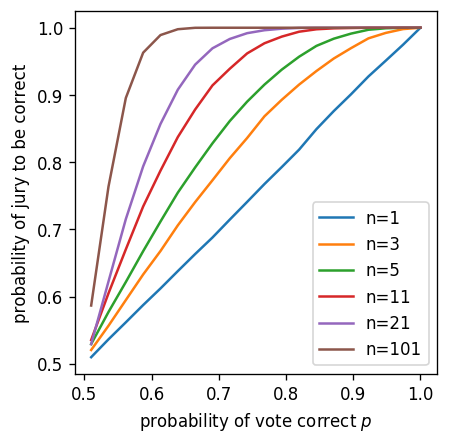

In [ ]:
# Implement here

# II. AdaBoost
* Use `AdaBoostClassifier` model from sklearn.ensemble to find a strong classifier on the sample set given below, using $n$ weak learners:
    - For the base weak learners, use a ***linear*** SVM classifier (use `LinearSVC` from sklearn.svm) with the next parameters:
        - *tol=1e-10,loss='hinge', C=1000, max_iter=50000*
    - Split the sample set into 2/3rd train set and 1/3 test set.
    - Train ensemble classifiers where each has a different number of estimators $n\in \{1, 3, 10, 50, 100, 1000, 10000\}$.
    - Use the given function plot_data or your own function to plot the final decision plane of each ensemble model.

* Answer to the next questions:

 1. How does the overall train set accuracy change with $n$?
 2. Does your model start to overfit at some point? How can you test and detect such a point?
 3. For this specific task, what is the optimal number of estimators? Hint: use `estimator_errors_` attribute.

 ---
 **Note1:**
 1. If ***linearSVC*** doesn't work, you can use ***SVC*** with: `kernel='linear'` and `probability=True`.
 2. Explain you results in text and support it with figures.

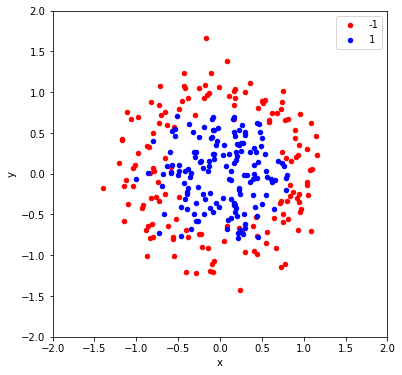

In [ ]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.2, random_state=101, factor=0.5)
y = y*2 - 1
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {-1:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(6,6))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [ ]:
def plot_data(X, y, h, ax):
    '''Plotting function. The function will plot the given instances as well will color the
    background according to the decision boundaries of the model.
    X - 2D array
    y - Vector of labels
    h - A function which accepts X and returns the predicted labels. It should be based on the trained model.
    ax - axes.Axes object as returned by matplotlib.pyplot.subplots function.'''
    def make_meshgrid(x, y, h=.01):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = h(np.c_[xx.ravel(), yy.ravel()])  # predictions
        Z = Z.reshape(xx.shape)
        if 'levels' in params and len(params['levels'])<2:
          out = ax.contour(xx, yy, Z, **params, colors='k', edgesize=10)
        else:
          out = ax.contourf(xx, yy, Z, **params)
        return out

    # scatter plot, dots colored by class value
    df = DataFrame(dict(x0=X[:,0], x1=X[:,1], label=y))
    colors = {-1:'red', 1:'blue'}
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x0', y='x1',
                 alpha=0.5, label=key, color=colors[key])

    # decision boundary
    xx1, xx2 = make_meshgrid(X[:,0], X[:,1])
    plot_contours(ax, h, xx1, xx2, alpha=0.2)#, levels=[0.5])

    ax.axis('scaled')

#### Answer


Train accuracy for 1 estimators: 0.52
Test accuracy for 1 estimators: 0.46 

Train accuracy for 3 estimators: 0.6
Test accuracy for 3 estimators: 0.5 

Train accuracy for 10 estimators: 0.615
Test accuracy for 10 estimators: 0.68 

Train accuracy for 50 estimators: 0.69
Test accuracy for 50 estimators: 0.62 

Train accuracy for 100 estimators: 0.69
Test accuracy for 100 estimators: 0.62 

Train accuracy for 1000 estimators: 0.69
Test accuracy for 1000 estimators: 0.62 

Train accuracy for 10000 estimators: 0.69
Test accuracy for 10000 estimators: 0.62 



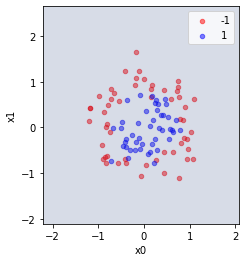

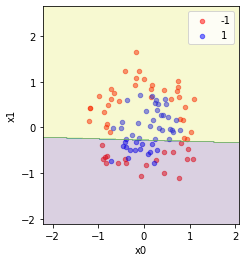

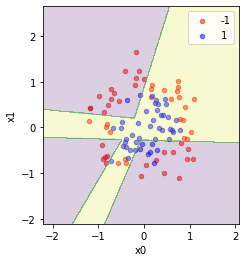

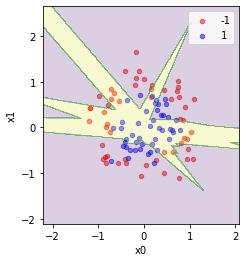

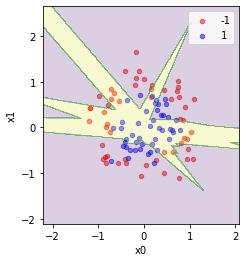

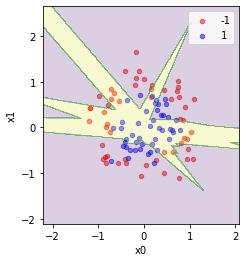

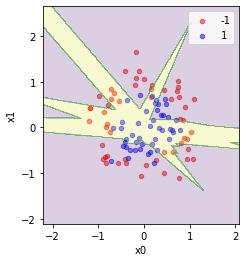

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# Split dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=5)

# Create weak classifier of Linear SVM
svm_clf = LinearSVC(tol=1e-10, loss='hinge', C=1000, max_iter=50000)

estimators = [1, 3, 10, 50, 100, 1000, 10000]
train_scores = []
test_scores = []
for e in estimators:
    # Create adaboost classifier with e estimators and svm classifier
    ab_clf = AdaBoostClassifier(base_estimator=svm_clf,
                                n_estimators=e,
                                random_state=5,
                                algorithm='SAMME')
    # Train the model
    ab_clf.fit(X_train, y_train)

    # Make prediction for train and test set and get the score of the prediction
    train_score = ab_clf.score(X_train, y_train)
    train_scores.append(train_score)
    test_score = ab_clf.score(X_test, y_test)
    test_scores.append(test_score)

    fig, ax = plt.subplots()
    plot_data(X_test, y_test, ab_clf.predict, ax)
    print("Train accuracy for", e, "estimators:", train_score)
    print("Test accuracy for", e, "estimators:", test_score, '\n')

    ## print the model error ##
    # print(ab_clf.estimator_errors_)


We can see, according to the scores results, that the performance of the model on the training dataset is better than the performance on the test dataset.
The scores on the training dataset are improving with the increasing of the estimators number, up to a level of converge where it stays stable. The scores on the testing dataset are improving till it reach to a point where it start to decrease and stablize.

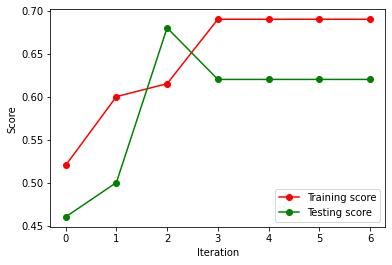

In [ ]:
# plot of train and test scores vs number of estimators
plt.plot(train_scores, "o-", color="r", label="Training score")
plt.plot(test_scores, "o-", color="g", label="Testing score")
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()

The above graph visualize the train and test scores of the model for the number of estimators

# Your answers here

1. The train accuracy is improving with the increasing of n, up to a level where it converge and stabilize.

2. We can see that even though the accuracy of the training set continue to increase, the test set accuracy is increasing up to a certain number of estimators, and then it starts to decrease. this peak number is the number of estimators which start to overfit the training data.

3. We used the estimator_errors_ attribute in each iteration (different estimators) and noticed that the error is less than 0.5 untill we reached the convergence point, then the number of estimators with error less than 0.5 are 35, and from the 36th estimator the error is 1.0.
As a result, we suggest that the optimal number of estimators is 35.